### Interpolation between 4 and 2 Weyl-point configurations

In [1]:
#import the things we need
import numpy as np
import sympy as sp
import wpp2
import matplotlib.pyplot as plt
import timeit
import interpol as itp

Read in a system with 4 and 2 Weyl-points

In [2]:
#obtain the expressions from the datasets
#x1 and z1 correspond to a configuration containing 4 Weyl-points
#x2 and z2 correspond to a configuration containing 2 Weyl-points
x1_str = "Add(Mul(Integer(-1), Float('0.14840720498475934', precision=53), sin(Symbol('beta_2', Real=True))), Mul(Integer(-1), Float('0.075442989493315848', precision=53), sin(Mul(Integer(2), Symbol('beta_2', Real=True)))), Mul(Integer(-1), Float('0.045838237294261619', precision=53), sin(Mul(Integer(3), Symbol('beta_2', Real=True)))))"
z1_str = "Add(Mul(Integer(-1), Float('0.10204460847341812', precision=53), sin(Symbol('beta_1', Real=True))), Mul(Integer(-1), Float('0.48702851911378509', precision=53), sin(Mul(Integer(2), Symbol('beta_1', Real=True)))), Mul(Float('0.45208901439125093', precision=53), sin(Mul(Integer(3), Symbol('beta_1', Real=True)))), Mul(Integer(-1), Float('0.30357448883056837', precision=53), cos(Symbol('beta_1', Real=True))), Mul(Float('0.27338788543667658', precision=53), cos(Mul(Integer(2), Symbol('beta_1', Real=True)))), Mul(Integer(-1), Float('0.36570037800494737', precision=53), cos(Mul(Integer(3), Symbol('beta_1', Real=True)))), Mul(Integer(-1), Float('0.44963234997559165', precision=53), cos(Symbol('beta_2', Real=True))), Mul(Float('0.20812364078015766', precision=53), cos(Mul(Integer(2), Symbol('beta_2', Real=True)))), Mul(Integer(-1), Float('0.21683888381349004', precision=53), cos(Mul(Integer(3), Symbol('beta_2', Real=True)))))"
x2_str = "Add(Mul(Float('0.37257736193066882', precision=53), sin(Symbol('beta_2', Real=True))), Mul(Float('0.11796311630773015', precision=53), sin(Mul(Integer(2), Symbol('beta_2', Real=True)))), Mul(Float('0.21779037564701997', precision=53), sin(Mul(Integer(3), Symbol('beta_2', Real=True)))))"
z2_str = "Add(Mul(Float('0.063538512235609024', precision=53), sin(Symbol('beta_1', Real=True))), Mul(Integer(-1), Float('0.13969581840940326', precision=53), sin(Mul(Integer(2), Symbol('beta_1', Real=True)))), Mul(Float('0.058839935102390495', precision=53), sin(Mul(Integer(3), Symbol('beta_1', Real=True)))), Mul(Float('0.41272339912468914', precision=53), cos(Symbol('beta_1', Real=True))), Mul(Integer(-1), Float('0.44158127558384352', precision=53), cos(Mul(Integer(2), Symbol('beta_1', Real=True)))), Mul(Float('0.14938490866650866', precision=53), cos(Mul(Integer(3), Symbol('beta_1', Real=True)))), Mul(Float('0.25857334395235199', precision=53), cos(Symbol('beta_2', Real=True))), Mul(Integer(-1), Float('0.37254760528159625', precision=53), cos(Mul(Integer(2), Symbol('beta_2', Real=True)))), Mul(Float('0.45285577626455886', precision=53), cos(Mul(Integer(3), Symbol('beta_2', Real=True)))))"

The above expressions can be copied from the datafiles.

In [3]:
#reobtain the expressions from the strings
x1 = sp.parsing.sympy_parser.parse_expr(x1_str)
z1 = sp.parsing.sympy_parser.parse_expr(z1_str)
x2 = sp.parsing.sympy_parser.parse_expr(x2_str)
z2 = sp.parsing.sympy_parser.parse_expr(z2_str)

Retrieve the symbols

In [4]:
#we need to get back the symbols from the expressions to use them again
symbol_list = list(z2.free_symbols)
print(symbol_list)

[beta_1, beta_2]


In [5]:
if str(symbol_list[0]) == "beta_1":
    beta1 = symbol_list[0]
    beta2 = symbol_list[1]
else:
    beta2 = symbol_list[0]
    beta1 = symbol_list[1]
    
print(beta1, beta2)

beta_1 beta_2


In [73]:
#define a discrete interpolation
ts = np.linspace(0., 1., 20)

In [74]:
%%time
#do the interpolation, get the location and charges of the weyl points as a function of the interpolator t
locs_t, charges_t = itp.three_point_process(x1 = x1, z1 = z1, x2 = x2, z2 = z2, beta1 = beta1, beta2 = beta2, ts = ts)

CPU times: user 7.3 s, sys: 121 ms, total: 7.42 s
Wall time: 7.28 s


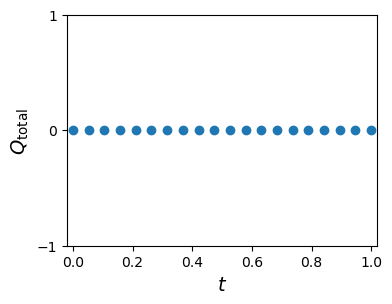

In [75]:
#Consistency check: calculate the total charge as a function of t
csum = [np.sum(charges_t[i]) for i in range(len(charges_t))]
fig = plt.figure(figsize =(4,3))
plt.scatter(ts, csum)
plt.xlabel(r"$t$", fontsize = 14)
plt.ylabel(r"$Q_{\mathrm{total}}$", fontsize = 14)
plt.yticks([-1,0,1])
plt.xlim(-0.02,1.02)
#plt.title(r"Total charge of the system during the interpolation" + "\n" + r"$D(t) = \left( 1 - t \right) \cdot D_1 +  t \cdot D_2$", fontsize = 10 )
#plt.savefig("intpol_totcharge_1.pdf", dpi = 500, bbox_inches='tight')
plt.show()

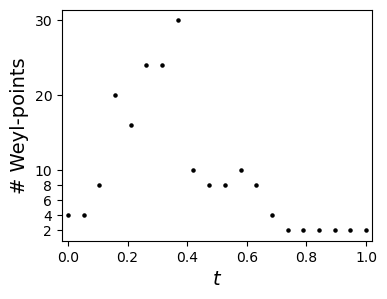

In [76]:
#Calculate the number of Weyl-points during the interpolation
wpnum = [len(locs_t[i]) for i in range(len(locs_t))]
fig = plt.figure(figsize =(4,3))
plt.scatter(ts, wpnum, s = 5, color ="black")
plt.xlabel(r"$t$", fontsize = 14)
plt.ylabel(r"# Weyl-points", fontsize = 14)
plt.yticks([2, 4, 6, 8, 10, 20, 30])
plt.xlim(-0.02,1.02)
#plt.title(r"Total number of Weyl-points in the system during the interpolation" + "\n" + r"$D(t) = \left( 1 - t \right) \cdot D_1 +  t \cdot D_2$", fontsize = 10 )
#plt.savefig("intpol_totnum_1.pdf", dpi = 500, bbox_inches='tight')
plt.show()

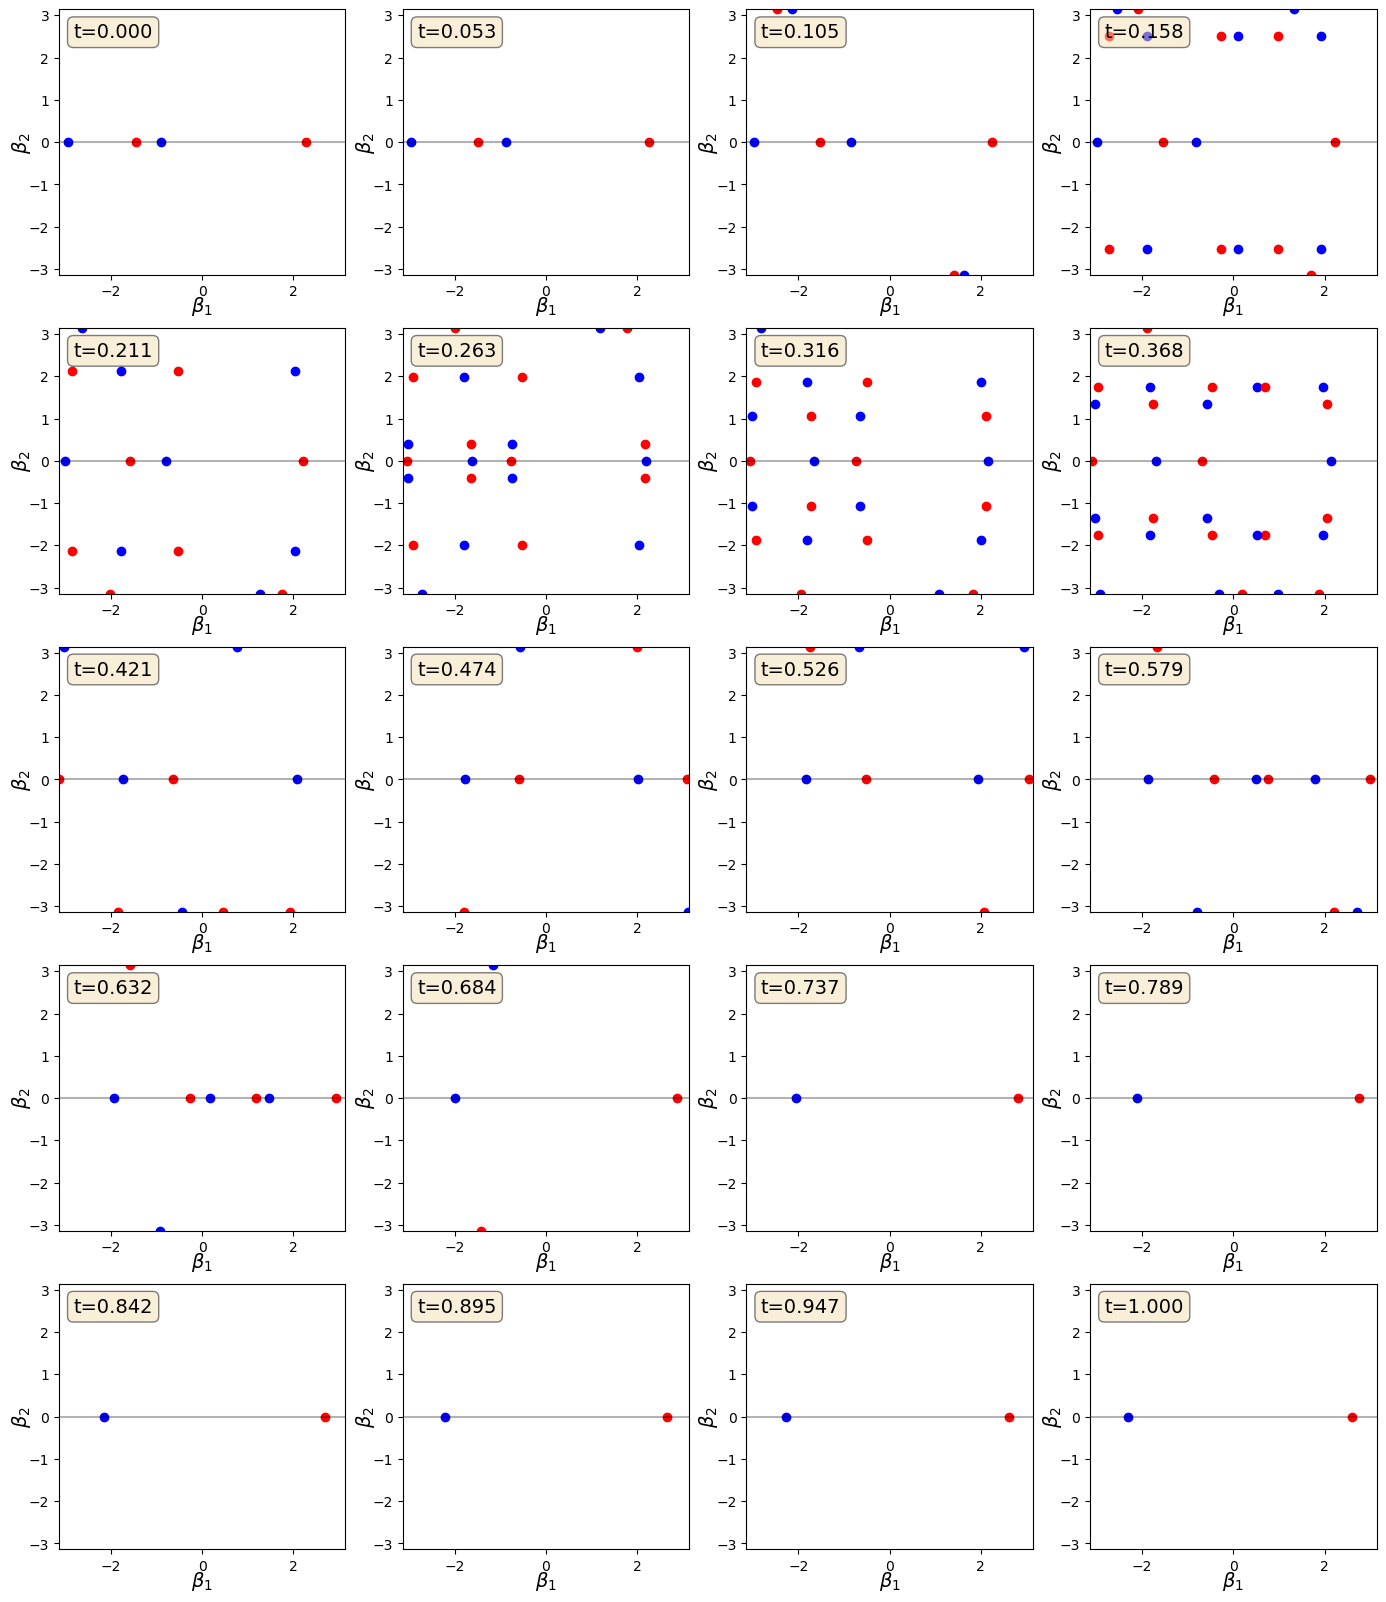

In [79]:
#Plot the location of the Weyl points as a cartoon
fig, axs = plt.subplots(int(len(ts)/4), 4, figsize = (17, 20 * (len(ts) / 20)))
for idx, ax in enumerate(axs.flat):
    #for each t point add a label to the plot 
    textstr = f"t={ts[idx]:.3f}"
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    #add labels to the axis
    ax.set_xlabel(r"$\beta_1$", fontsize = 14, labelpad = -3)
    ax.set_ylabel(r"$\beta_2$", fontsize = 14, labelpad = -3)
    ax.set_ylim([-np.pi,np.pi])
    ax.set_xlim([-np.pi,np.pi])
    
    #for each location in locs_t plot the weyl points
    locs = locs_t[idx]
    cs = charges_t[idx]
    
    ax.plot([-np.pi, np.pi], [0,0], c = "black", alpha = 0.3)
    
    for i in range(len(locs)):
        if cs[i] == 1:
            color = "red"
        elif cs[i] == -1 : 
            color = "blue"
        else:
            print("Warning, invalid charge!")
            
        ax.scatter(locs[i][0], locs[i][1], c = color)
        
plt.savefig("interpolation_cartoon.pdf", dpi = 500, bbox_inches='tight')